## Last Name, First Name

Desc: This notebook serves as a template for binary classification problem.

In [2]:
# import packages 
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
from IPython.display import Image
from io import StringIO

%matplotlib inline

## 1. Import dataset

In [3]:
stocks = pd.read_csv('Weekly.csv', na_values='?').dropna()
print(stocks.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1088
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1089 non-null   int64  
 1   Year        1089 non-null   int64  
 2   Lag1        1089 non-null   float64
 3   Lag2        1089 non-null   float64
 4   Lag3        1089 non-null   float64
 5   Lag4        1089 non-null   float64
 6   Lag5        1089 non-null   float64
 7   Volume      1089 non-null   float64
 8   Today       1089 non-null   float64
 9   Direction   1089 non-null   object 
dtypes: float64(7), int64(2), object(1)
memory usage: 93.6+ KB
None


In [4]:
stocks.tail()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1084,1085,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,1086,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,1087,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,1088,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up
1088,1089,2010,1.034,0.283,1.281,2.969,-0.861,2.707105,0.069,Up


In [5]:
# convert categorical variables to dummy variables (0/1)
stocks_up = pd.get_dummies(stocks['Direction'])

# Join the dummy variables to the main dataframe
stocks_new = pd.concat([stocks, stocks_up], axis=1)
stocks_new.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Down,Up
0,1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,1,0
1,2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,1,0
2,3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,0,1
3,4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,0,1
4,5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,0,1


### Q1
After dropping the missing values (if any), what percentage of observations in the sample has Direction = “Up”?   

In [21]:
# type your anwser for Q1 here
count = stocks_new["Up"].value_counts()
print("Number of '1' in column Up: ", count[1])
print("Total of number of value in UP :", len(stocks_new["Up"]))
print("Percentage is ",count[1]*100 / len(stocks_new["Up"]), "%")

Number of '1' in column Up:  605
Total of number of value in UP : 1089
Percentage is  55.55555555555556 %


### Q2
Randomly split the dataset, so that the training dataset includes 60% of the original dataset.

In [26]:
from sklearn.model_selection import train_test_split
x_columns = ['Year', 'Lag1','Lag2','Lag3','Lag4','Lag5','Volume']
X = stocks_new[x_columns]
y = stocks_new['Up']


# Q2: split the dataset 


X_train, X_test, y_train, y_test = train_test_split\
(X, y, train_size = 0.6, random_state = 12)





,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
577,2001,-0.938,-4.277,-1.006,-2.572,-0.404,1.211820
1010,2009,-0.253,-2.640,0.651,2.279,3.623,5.119916
542,2000,0.910,-1.569,0.515,-1.375,7.202,1.119440
441,1998,-3.872,1.926,1.562,1.167,2.957,0.680056
655,2002,-2.418,-2.635,1.302,2.215,5.137,1.311925
...,...,...,...,...,...,...,...
851,2006,-2.788,0.630,1.036,-1.875,-2.604,2.682616
167,1993,-2.653,1.607,0.102,-1.427,-0.533,0.284040
385,1997,-1.268,0.608,4.110,1.147,0.148,0.522190
41,1990,-0.637,1.077,0.606,2.343,-2.487,0.126532


### Q3
Fit a logistic regression model with Direction as the response variable and the five lag variables plus Volume as the predictors. 

In [16]:
from sklearn.linear_model import LogisticRegression

# Q3: build the logit regression model, using the training dataset

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.coef_)



[[ 0.00014935 -0.01898549  0.05937632  0.01215813 -0.00218425  0.00155399
  -0.01518743]]


### Q4
Generate a predicted value for each week in the test data. Indicate the distribution of the predicted label.

In [18]:
y_pred_logit = logreg.predict(X_test)
TESTdf = X_test[x_columns]
TESTdf['Actual'] = y_test
TESTdf['Predicted'] = y_pred_logit
TESTdf.head(10)



,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Actual,Predicted
577,2001,-0.938,-4.277,-1.006,-2.572,-0.404,1.211820,0,1
1010,2009,-0.253,-2.640,0.651,2.279,3.623,5.119916,0,1
542,2000,0.910,-1.569,0.515,-1.375,7.202,1.119440,1,1
441,1998,-3.872,1.926,1.562,1.167,2.957,0.680056,0,1
655,2002,-2.418,-2.635,1.302,2.215,5.137,1.311925,0,1
188,1993,-0.626,0.082,0.174,0.960,1.337,0.281820,0,1
122,1992,-0.900,-0.450,0.321,0.958,-1.433,0.189960,0,1
526,2000,-1.001,5.686,-0.946,-2.958,-2.615,1.161580,1,1
1015,2009,0.839,4.134,6.967,-1.929,-2.446,5.294932,1,1
497,1999,0.673,2.106,-2.140,-2.080,-4.359,0.660650,1,1


### Q5
Compute the confusion matrix and the accuracy score for the test data, i.e., the rest 40% of the full dataset.  

In [19]:
# Q5: confusion matrix, calculate accuracy
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_logit).ravel()
print(tn, fp, fn, tp)

confusion_matrix(y_test, y_pred_logit)



1 155 6 165


array([[  1, 155],
       [  6, 165]], dtype=int64)

In [20]:

print("Accuracy = %s" %((tn+tp)/(tn+tp+fn+fp)))


Accuracy = 0.5076452599388379


### Q6
Create a decision tree model with the same X and y variables as you did for the logistic model. Set max_depth to 3 in this tree model.

In [27]:
from sklearn.tree import DecisionTreeClassifier 
stocktree = DecisionTreeClassifier(max_depth=3)
stocktree.fit(X_train, y_train)





DecisionTreeClassifier(max_depth=3)

### Q7
Print out the image of the tree models. Briefly describe the tree according to the image. 

In [28]:
from sklearn.tree import export_text

r = export_text(stocktree, feature_names=x_columns)
print(r)






|--- Lag2 <= 2.89
|   |--- Lag2 <= -2.36
|   |   |--- Volume <= 7.33
|   |   |   |--- class: 0
|   |   |--- Volume >  7.33
|   |   |   |--- class: 1
|   |--- Lag2 >  -2.36
|   |   |--- Lag5 <= -1.48
|   |   |   |--- class: 0
|   |   |--- Lag5 >  -1.48
|   |   |   |--- class: 1
|--- Lag2 >  2.89
|   |--- Lag5 <= -0.08
|   |   |--- Lag4 <= -8.23
|   |   |   |--- class: 0
|   |   |--- Lag4 >  -8.23
|   |   |   |--- class: 1
|   |--- Lag5 >  -0.08
|   |   |--- Lag3 <= 2.18
|   |   |   |--- class: 0
|   |   |--- Lag3 >  2.18
|   |   |   |--- class: 1



In [29]:
year = list(stocks_new['Year'].unique())
year = [str(i) for i in year]

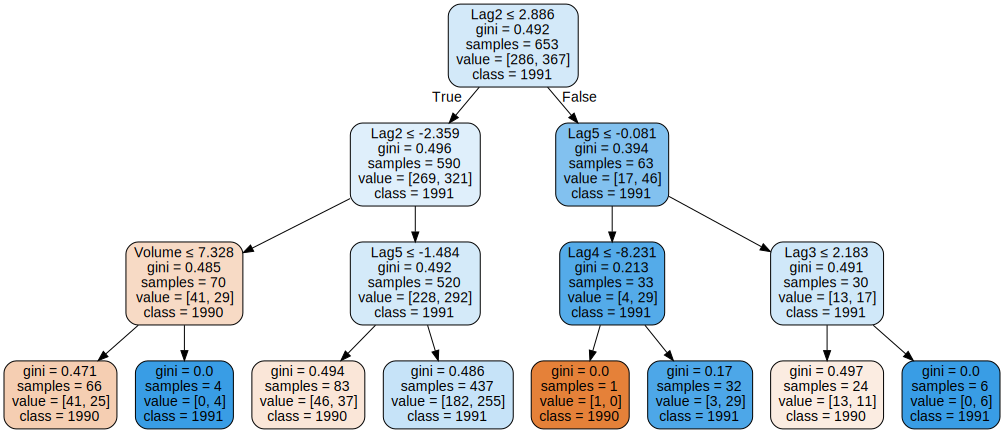

In [30]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(stocktree,
                    feature_names=x_columns,  
                    class_names=year,  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Q8
Print out the variable importance scores. Describe which variable is more important in this prediction.

In [34]:
y_pred_tree = stocktree.predict(X_test)
TESTdf = X_test[x_columns]
TESTdf['Actual'] = y_test
TESTdf['Predicted'] = y_pred_tree
# TESTdf.head(10)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_tree).ravel()
print(tn, fp, fn, tp)


print("Accuracy = %s" %((tn+tp)/(tn+tp+fn+fp)))


49 149 66 172
Accuracy = 0.5068807339449541


### Q9
What percentage of all observations is being correctly predicted in the test data set by the decision tree? 

In [35]:
print("Accuracy = %s" %((tn+tp)/(tn+tp+fn+fp)))
print("Sensitivy = %s" %(tp/(tp+fn)))
print("Specificity = %s" %(tn/(tn+fp)))





Accuracy = 0.5068807339449541
Sensitivy = 0.7226890756302521
Specificity = 0.2474747474747475


### Q10
In the test data set, consider only those observations for which the actual value of the target variable equals 1, Up = 1. What percentage of these observations is being correctly predicted by the decision tree?